# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [754]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

# Read the CSV files
students = pd.read_csv("students_c.csv")
grades = pd.read_csv("grades_c.csv")
attendance = pd.read_csv("attendance_c.csv")

In [755]:
# Info student dataset
students.info()

# Describe student dataset
students.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1729 non-null   int64  
 1   ContactID        1729 non-null   int64  
 2   Created          1729 non-null   object 
 3   Updated          1729 non-null   object 
 4   Location         1729 non-null   object 
 5   Campaign         1671 non-null   object 
 6   SubFaculty       1729 non-null   object 
 7   ProgramType      1729 non-null   object 
 8   Status           1729 non-null   object 
 9   StartDate        1729 non-null   object 
 10  EndDate          1729 non-null   object 
 11  LDA              1729 non-null   object 
 12  TerminationDate  1700 non-null   object 
 13  Gender           1729 non-null   object 
 14  BirthDate        1729 non-null   object 
 15  EducationLevel   1729 non-null   object 
 16  Postal           1729 non-null   object 
 17  PrimaryFunder 

,Unnamed: 0,ContactID,NetRevenue,EntranceExam
count,1729.000000,1729.000000,1729.000000,1532.000000
mean,864.000000,323225.957779,17151.630804,21.214752
std,499.263624,244785.247010,5151.726513,3.554406
min,0.000000,6604.000000,-6385.460000,12.000000
25%,432.000000,8904.000000,15547.110000,19.000000
50%,864.000000,513533.000000,17418.200000,21.000000
75%,1296.000000,521425.000000,18600.000000,23.000000
max,1728.000000,530268.000000,26695.640000,33.000000


In [756]:
# Info attendance dataset
attendance.info()

# Describe attendance dataset
attendance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180263 entries, 0 to 180262
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      180263 non-null  int64 
 1   AttendanceId    180263 non-null  int64 
 2   Created         180263 non-null  object
 3   Updated         180263 non-null  object
 4   ContactID       180263 non-null  int64 
 5   AttendanceDate  180263 non-null  object
 6   Status          180263 non-null  object
 7   StartTime       180263 non-null  object
 8   EndTime         180263 non-null  object
dtypes: int64(3), object(6)
memory usage: 12.4+ MB


,Unnamed: 0,AttendanceId,ContactID
count,180263.000000,1.802630e+05,180263.000000
mean,90271.278826,7.114841e+06,411742.562600
std,52108.602552,5.426266e+04,201432.852482
min,0.000000,7.020316e+06,410.000000
25%,45129.500000,7.067278e+06,511064.000000
50%,90290.000000,7.116227e+06,515440.000000
75%,135415.500000,7.162122e+06,521606.000000
max,180490.000000,7.207592e+06,530537.000000


In [757]:
# Finding unique attendance statuses
[attendance['Status'].unique() for col_name in attendance.columns]

[array(['Present', 'Absent', 'Late', 'Left Early', 'Makeup Present',
        'Exempt', 'Holiday', 'School Closed', 'Study Week'], dtype=object),
 array(['Present', 'Absent', 'Late', 'Left Early', 'Makeup Present',
        'Exempt', 'Holiday', 'School Closed', 'Study Week'], dtype=object),
 array(['Present', 'Absent', 'Late', 'Left Early', 'Makeup Present',
        'Exempt', 'Holiday', 'School Closed', 'Study Week'], dtype=object),
 array(['Present', 'Absent', 'Late', 'Left Early', 'Makeup Present',
        'Exempt', 'Holiday', 'School Closed', 'Study Week'], dtype=object),
 array(['Present', 'Absent', 'Late', 'Left Early', 'Makeup Present',
        'Exempt', 'Holiday', 'School Closed', 'Study Week'], dtype=object),
 array(['Present', 'Absent', 'Late', 'Left Early', 'Makeup Present',
        'Exempt', 'Holiday', 'School Closed', 'Study Week'], dtype=object),
 array(['Present', 'Absent', 'Late', 'Left Early', 'Makeup Present',
        'Exempt', 'Holiday', 'School Closed', 'Study Week'], 

In [758]:
#Creating a column to calculate Attendance based on Status
attendance['Presence'] = None
# If Present, Late, Left Early, or Makeup Present, give 1 credit
attendance.loc[(attendance.Status == 'Present') | (attendance.Status == 'Late') | (attendance.Status == 'Left Early') | (attendance.Status == 'Makeup Present'), 'Presence'] = 1
# If Absent, give 0 credits
attendance.loc[(attendance.Status == 'Absent'), 'Presence'] = 0
# If Exempt, Holiday, or School Closed, marked as null (from column creation)
attendance['Presence']

0         1
1         1
2         1
3         0
4         1
         ..
180258    1
180259    1
180260    1
180261    1
180262    1
Name: Presence, Length: 180263, dtype: object

In [759]:
# Checking that the Presence field is summing properly per user (ContactID)
attendance.groupby(['ContactID'])['Presence'].sum()

ContactID
410         1
4582        1
6773        1
7119       23
7334        1
         ... 
529848     20
530064    142
530114      8
530268     10
530537    114
Name: Presence, Length: 1573, dtype: object

In [760]:
# Checking that the count of records per user (ContactID) in Presence looks accurate
attendance.groupby(['ContactID'])['Presence'].count()

ContactID
410         1
4582        1
6773        1
7119       36
7334        1
         ... 
529848     20
530064    143
530114      8
530268     10
530537    114
Name: Presence, Length: 1573, dtype: int64

In [761]:
# Calculating percentage of attendance per user
percent = (attendance.groupby(['ContactID'])['Presence'].sum() / attendance.groupby(['ContactID'])['Presence'].count() * 100)
# Adding attendance percentage to Students df
students_percent = students.merge(percent, on='ContactID')

In [762]:
# Renaming Presence column to AttendancePercent
students_percent.rename(columns = {'Presence':'AttendancePercent'}, inplace = True)

# Changing AttendancePercent to Float
students_percent['AttendancePercent'] = students_percent['AttendancePercent'].apply(pd.to_numeric)


In [763]:
# Info grades dataset
grades.info()

# Describe grades dataset
grades.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25624 entries, 0 to 25623
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25624 non-null  int64  
 1   GradeID     25624 non-null  int64  
 2   Created     25624 non-null  object 
 3   Updated     25624 non-null  object 
 4   ContactID   25624 non-null  int64  
 5   CourseID    25624 non-null  int64  
 6   CourseName  25624 non-null  object 
 7   Score       25624 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ MB


,Unnamed: 0,GradeID,ContactID,CourseID,Score
count,25624.000000,25624.000000,25624.000000,25624.000000,25624.000000
mean,12880.401811,689839.211599,383039.265220,1535.812168,91.948330
std,7436.994282,8350.369672,219763.935994,195.225744,12.396341
min,0.000000,675680.000000,2637.000000,1257.000000,0.000000
25%,6443.750000,682566.750000,156842.000000,1357.000000,90.000000
50%,12874.500000,690350.500000,514771.000000,1461.000000,96.000000
75%,19331.250000,697296.250000,519987.000000,1726.000000,99.000000
max,25756.000000,703897.000000,530537.000000,1850.000000,100.000000


In [764]:
# Calculating average grade score per user
score = (grades.groupby(['ContactID'])['Score'].sum() / grades.groupby(['ContactID'])['Score'].count())
score
# Adding AverageScore to Students df
students_scores = students_percent.merge(score, on='ContactID')
students_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1365
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1366 non-null   int64  
 1   ContactID          1366 non-null   int64  
 2   Created            1366 non-null   object 
 3   Updated            1366 non-null   object 
 4   Location           1366 non-null   object 
 5   Campaign           1308 non-null   object 
 6   SubFaculty         1366 non-null   object 
 7   ProgramType        1366 non-null   object 
 8   Status             1366 non-null   object 
 9   StartDate          1366 non-null   object 
 10  EndDate            1366 non-null   object 
 11  LDA                1366 non-null   object 
 12  TerminationDate    1366 non-null   object 
 13  Gender             1366 non-null   object 
 14  BirthDate          1366 non-null   object 
 15  EducationLevel     1366 non-null   object 
 16  Postal             1366 

In [765]:
# Renaming Score column to AverageGrade
students_scores.rename(columns = {'Score':'AverageGrade'}, inplace = True)

In [766]:
#Shortening dataframe name for easier coding
df = students_scores.copy(deep=True)

# Dropping irrelevant columns
df.drop(df.columns[[0, 2, 3, 5, 11, 12, 13, 14, 15, 16, 17]], axis=1, inplace=True)
df

,ContactID,Location,SubFaculty,ProgramType,Status,StartDate,EndDate,NetRevenue,EntranceExam,Period,AttendancePercent,AverageGrade
0,8904,Kansas City,Massage Therapy,Certificate,1.4 Complete,1/6/2020 12:00:00 AM,4/27/2021 12:00:00 AM,16756.0,19.0,Day,95.172414,86.740741
1,9078,Kansas City,Massage Therapy,Certificate,1.4 Complete,4/13/2020 12:00:00 AM,6/29/2021 12:00:00 AM,15174.4,23.0,Day,99.354839,97.888889
2,8433,Kansas City,Massage Therapy,Certificate,1.4 Complete,5/20/2019 12:00:00 AM,12/17/2020 12:00:00 AM,14631.0,16.0,Day,100.000000,98.000000
3,8849,Kansas City,Massage Therapy,Certificate,1.2w Withdrawn,10/22/2019 12:00:00 AM,2/6/2021 12:00:00 AM,3450.0,27.0,Day,86.956522,83.611111
4,9113,Kansas City,Massage Therapy,Certificate,1.4 Complete,4/13/2020 12:00:00 AM,3/24/2021 12:00:00 AM,15107.2,19.0,Day,89.285714,93.407407
...,...,...,...,...,...,...,...,...,...,...,...,...
1361,529655,Kansas City,Medical Assisting,AOS,1.1a Active,4/24/2023 12:00:00 AM,2/7/2024 12:00:00 AM,7100.0,20.0,Eve,100.000000,97.000000
1362,529206,Kansas City,Medical Assisting,AOS,1.1a Active,4/24/2023 12:00:00 AM,2/7/2024 12:00:00 AM,7100.0,23.0,Eve,100.000000,99.000000
1363,528902,Kansas City,Medical Assisting,AOS,1.1a Active,4/24/2023 12:00:00 AM,2/7/2024 12:00:00 AM,7100.0,22.0,Eve,100.000000,95.000000
1364,527774,Kansas City,Medical Assisting,AOS,1.1a Active,4/24/2023 12:00:00 AM,2/7/2024 12:00:00 AM,7100.0,15.0,Eve,100.000000,96.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

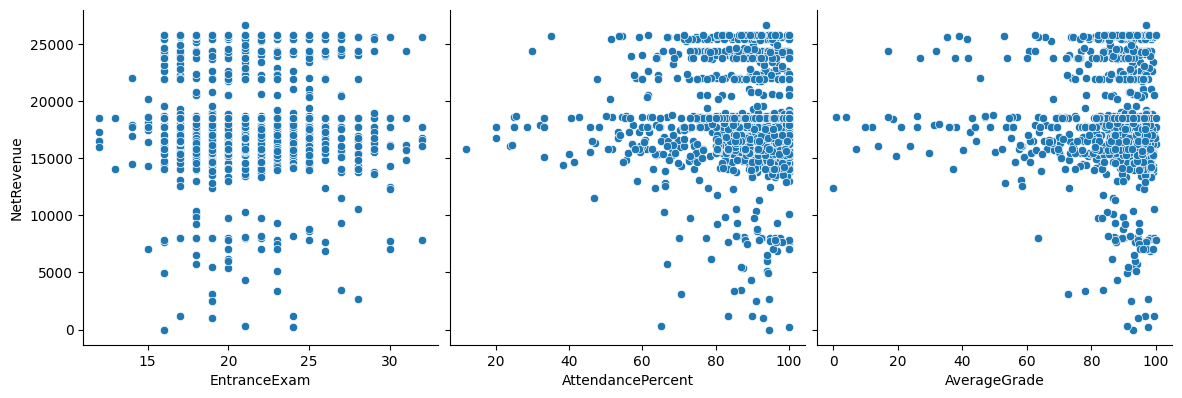

In [767]:
# Using pairplot to visualize the data for correlation
sns.pairplot(df, x_vars=['EntranceExam', 'AttendancePercent','AverageGrade'], y_vars='NetRevenue', size=4, aspect=1, kind='scatter')
plt.show()

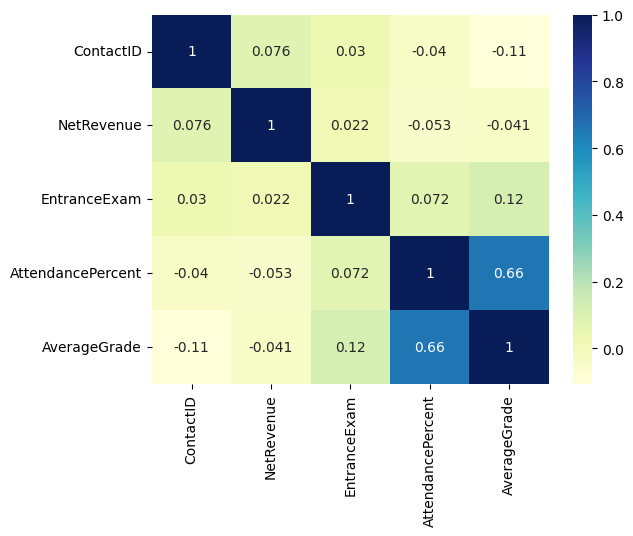

In [768]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [769]:
# Creating X and y
X = df['AttendancePercent']
y = df['AverageGrade']

In [770]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train
y_train


425      93.888889
164      96.346154
704      74.857143
970      81.000000
1255    100.000000
           ...    
802      10.000000
53       95.000000
350      94.148148
79       87.631579
792      95.851852
Name: AverageGrade, Length: 956, dtype: float64

In [771]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                25.346049
AttendancePercent     0.719191
dtype: float64

In [772]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AverageGrade   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     837.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          9.99e-133
Time:                        16:24:25   Log-Likelihood:                -3583.9
No. Observations:                 956   AIC:                             7172.
Df Residuals:                     954   BIC:                             7182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.3460      2.210     11.467      0.000      21.008      29.684
AttendancePercent     0.7192      0.025     28.945      0.000       0.670       0.768
==============================================================================
Omnibus:                      455.712   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6171.142
Skew:                          -1.823   Prob(JB):                         0.00
Kurtosis:                      14.901   Cond. No.                         591.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

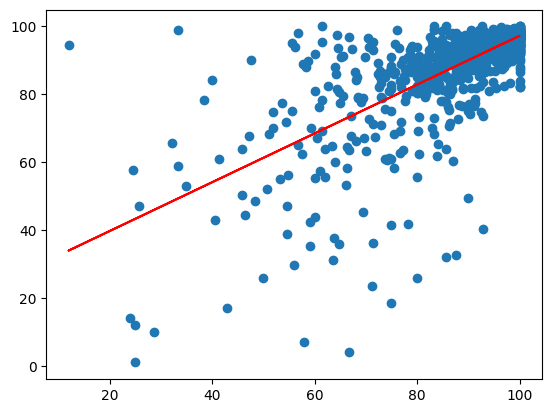

In [773]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 25.346 + 0.719*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [774]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

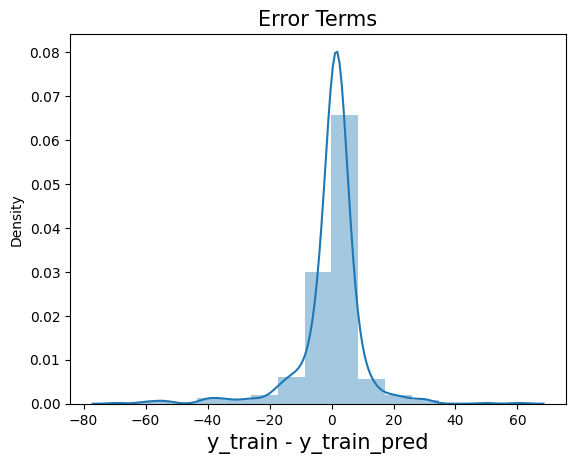

In [775]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

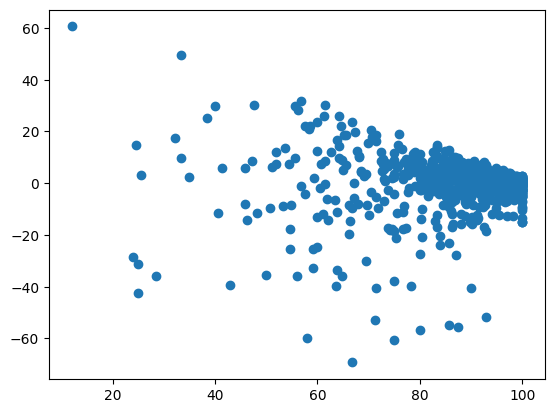

In [776]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.468
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
I do think it could be used because of the known relationship between attendance and grades, but the low R-squared value and the pattern produced in the residuals scatterplot might be telling me otherwise. 
3. Was your plot of the error terms a bell curve? A very high and narrow bell curve!